## Plots for runtimes per stage

In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PLOTS

In [3]:
df_enum = pd.read_csv("results/SPA_Scala_comparison_TO_augment_server_full_enum_infos.csv")
df_0ma = pd.read_csv("results/SPA_Scala_comparison_TO_augment_server_infos.csv")

In [4]:
df_enum = df_enum[df_enum["rewr(med)"] != "TO"]
df_0ma = df_0ma[df_0ma["rewr(med)"] != "TO"]

In [5]:
columns_to_convert = [
    'rewr(med)', 'stage0(med)', 'stage1(med)', 'stage2(med)', 'stage3(med)', 'rows',
    'rewr 1', 'rewr 2', 'rewr 3', 'rewr 4', 'rewr 5',
    'rewr(mean)', 'rewr(std)', 'stage0 1', 'stage0 2', 'stage0 3', 'stage0 4', 'stage0 5',
    'stage0(mean)', 'stage0(std)', 'stage1 1', 'stage1 2', 'stage1 3', 'stage1 4', 'stage1 5',
    'stage1(mean)', 'stage1(std)', 'stage2 1', 'stage2 2', 'stage2 3', 'stage2 4', 'stage2 5',
    'stage2(mean)', 'stage2(std)', 'stage3 1', 'stage3 2', 'stage3 3', 'stage3 4', 'stage3 5',
    'stage3(mean)', 'stage3(std)'
]

# Convert each column to float
df_enum[columns_to_convert] = df_enum[columns_to_convert].apply(pd.to_numeric, errors='coerce')

#print(df_enum.dtypes)

In [6]:
columns_to_convert = [
    'rewr(med)', 'stage0(med)', 'stage1(med)', 'rows',
    'rewr 1', 'rewr 2', 'rewr 3', 'rewr 4', 'rewr 5',
    'rewr(mean)', 'rewr(std)', 'stage0 1', 'stage0 2', 'stage0 3', 'stage0 4', 'stage0 5',
    'stage0(mean)', 'stage0(std)', 'stage1 1', 'stage1 2', 'stage1 3', 'stage1 4', 'stage1 5',
    'stage1(mean)', 'stage1(std)'
]

# Convert each column to float
df_0ma[columns_to_convert] = df_0ma[columns_to_convert].apply(pd.to_numeric, errors='coerce')

#print(df_0ma.dtypes)

In [7]:
df_0ma_long = pd.melt(df_0ma, value_vars=['stage0(med)', 'stage1(med)'], 
                      var_name='Stage', value_name='Value')
df_enum_long = pd.melt(df_enum, value_vars=['stage0(med)', 'stage1(med)', 'stage2(med)', 'stage3(med)'], 
                      var_name='Stage', value_name='Value')

/tmp/ipykernel_5540/3058256721.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_0ma = df_0ma_long.groupby(['intervals', 'Stage']).size().unstack(fill_value=0)
/tmp/ipykernel_5540/3058256721.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_enum = df_enum_long.groupby(['intervals', 'Stage']).size().unstack(fill_value=0)


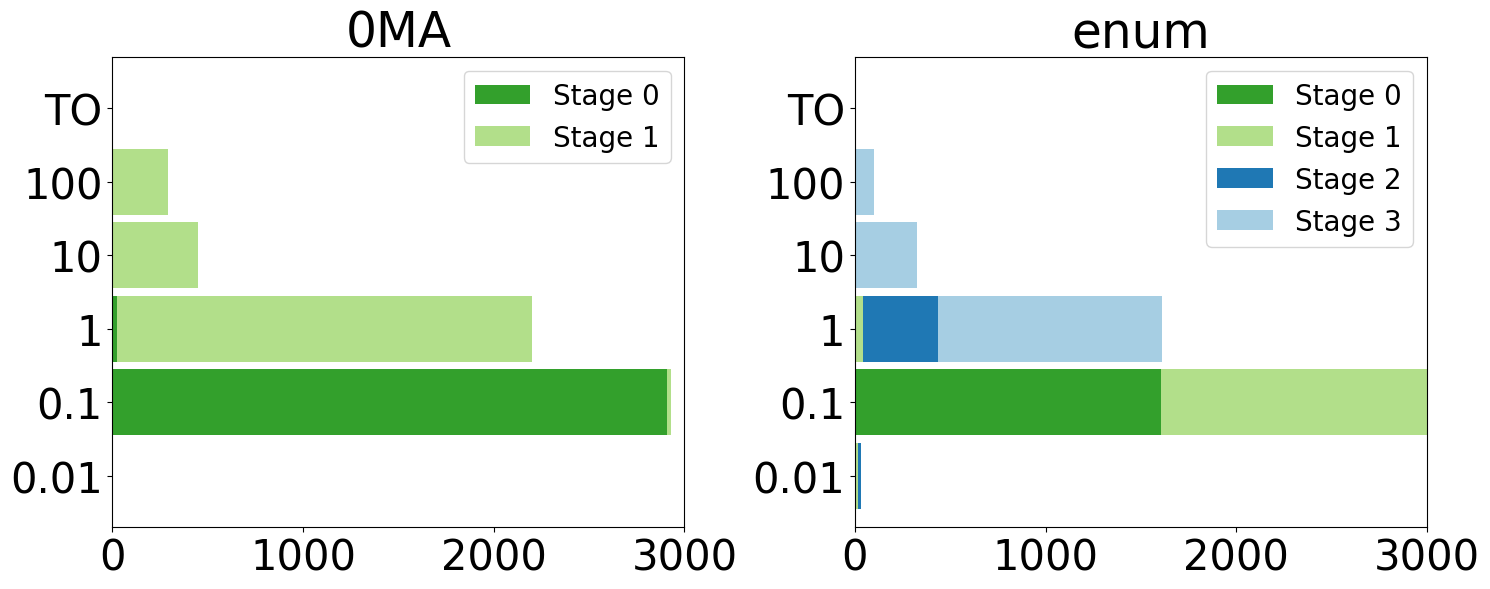

In [8]:
bins = [0, 0.01, 0.1, 1, 10, 100, float('inf')]
labels = ['0.01', '0.1', '1', '10', '100', 'TO']
df_0ma_long['intervals'] = pd.cut(df_0ma_long['Value'], bins=bins, labels=labels)
df_enum_long['intervals'] = pd.cut(df_enum_long['Value'], bins=bins, labels=labels)

# Group by interval and type, and count occurrences for 'orig mean'
grouped_0ma = df_0ma_long.groupby(['intervals', 'Stage']).size().unstack(fill_value=0)
grouped_enum = df_enum_long.groupby(['intervals', 'Stage']).size().unstack(fill_value=0)

# Paired colormap colors
paired_colors = [
    '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c',
    '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00',
    '#cab2d6', '#6a3d9a', '#ffff99', '#b15928'
]

# Assign colors to categories
category_colors = {
    'stage0(med)': paired_colors[3],
    'stage1(med)': paired_colors[2],
    'stage2(med)': paired_colors[1],
    'stage3(med)': paired_colors[0]
}

# Extract the colors in the order of the columns
colors = [category_colors[col] for col in grouped_enum.columns]

# Plot the results side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

fontsize = 30
titlesize = 35

# Plot for 'orig mean'
grouped_0ma.plot(kind='barh', stacked=True, color=colors, ax=ax1, width=0.9)
ax1.set_xlim(0,3000)
#ax1.set_xlabel('Count', fontsize=fontsize)  # Increase font size for x-axis label
#ax1.set_ylabel('Order of magnitude', fontsize=fontsize)  # Increase font size for y-axis label
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('0MA', fontsize=titlesize)  # Increase font size for title
ax1.legend(['Stage 0', 'Stage 1'], fontsize=20)  # Increase font size for legend
ax1.tick_params(axis='both', which='major', labelsize=fontsize)

# Plot for 'rewr mean'
grouped_enum.plot(kind='barh', stacked=True, color=colors, ax=ax2, width=0.9)
#ax2.set_xlabel('Count', fontsize=fontsize)
#ax2.set_ylabel('Order of magnitude', fontsize=fontsize)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('enum', fontsize=titlesize)
ax2.legend(['Stage 0', 'Stage 1', 'Stage 2', 'Stage 3'], fontsize=20)  
ax2.set_xlim(0,3000)
ax2.tick_params(axis='both', which='major', labelsize=fontsize)


# Adjust layout and show plot
plt.tight_layout()
plt.savefig('plots/SPA_stages_stacked_bar.png') 
plt.show()


/tmp/ipykernel_5540/939642326.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_0ma = df_0ma_long.groupby(['intervals', 'Stage']).size().unstack(fill_value=0)
/tmp/ipykernel_5540/939642326.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_enum = df_enum_long.groupby(['intervals', 'Stage']).size().unstack(fill_value=0)


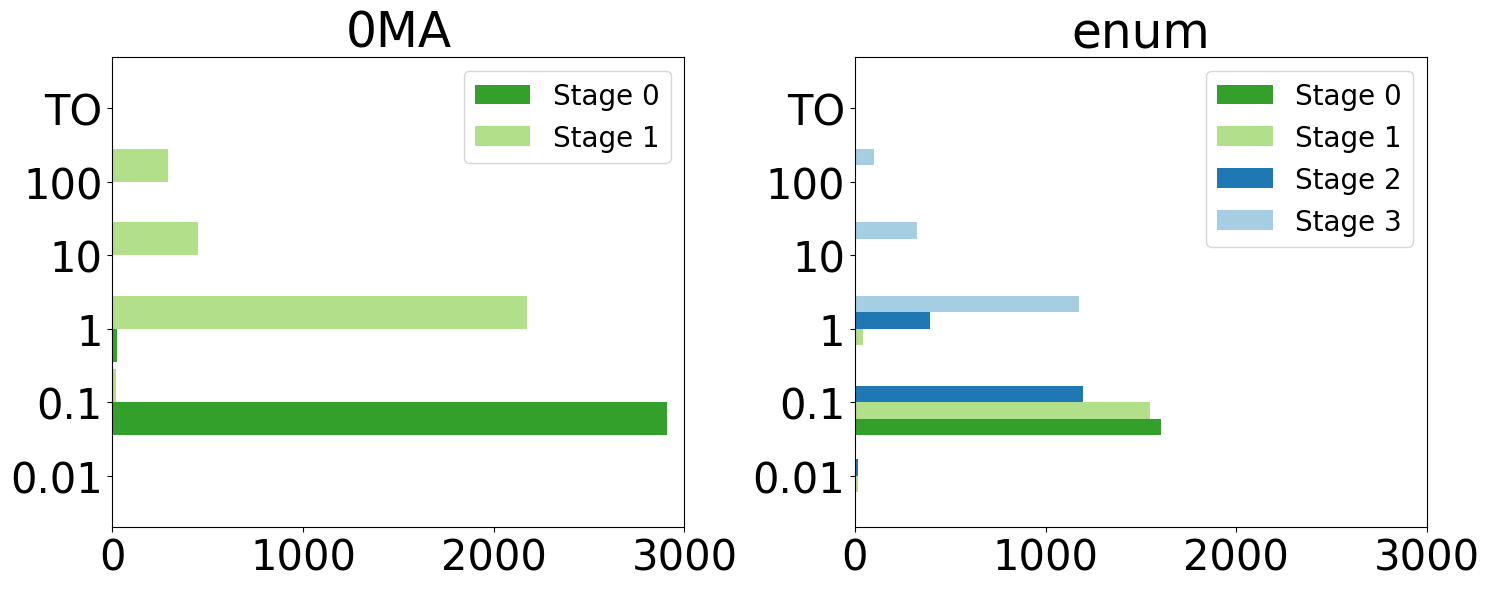

In [9]:
bins = [0, 0.01, 0.1, 1, 10, 100, float('inf')]
labels = ['0.01', '0.1', '1', '10', '100', 'TO']
df_0ma_long['intervals'] = pd.cut(df_0ma_long['Value'], bins=bins, labels=labels)
df_enum_long['intervals'] = pd.cut(df_enum_long['Value'], bins=bins, labels=labels)

# Group by interval and type, and count occurrences for 'orig mean'
grouped_0ma = df_0ma_long.groupby(['intervals', 'Stage']).size().unstack(fill_value=0)
grouped_enum = df_enum_long.groupby(['intervals', 'Stage']).size().unstack(fill_value=0)

# Paired colormap colors
paired_colors = [
    '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c',
    '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00',
    '#cab2d6', '#6a3d9a', '#ffff99', '#b15928'
]

# Assign colors to categories
category_colors = {
    'stage0(med)': paired_colors[3],
    'stage1(med)': paired_colors[2],
    'stage2(med)': paired_colors[1],
    'stage3(med)': paired_colors[0]
}

# Extract the colors in the order of the columns
colors = [category_colors[col] for col in grouped_enum.columns]

# Plot the results side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

fontsize = 30
titlesize = 35

custom_labels = ['Stage 0', 'Stage 1', 'Stage 2', 'Stage 3']  # Adjust as needed

# Plot for 'orig mean'
grouped_0ma.plot(kind='barh', stacked=False, color=colors, ax=ax1, width=0.9)
ax1.set_xlim(0,3000)
#ax1.set_xlabel('Count', fontsize=fontsize)  # Increase font size for x-axis label
#ax1.set_ylabel('Order of magnitude', fontsize=fontsize)  # Increase font size for y-axis label
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('0MA', fontsize=titlesize)  # Increase font size for title
ax1.legend(['Stage 0', 'Stage 1'], fontsize=20)  # Increase font size for legend
ax1.tick_params(axis='both', which='major', labelsize=fontsize)

# Plot for 'rewr mean'
grouped_enum.plot(kind='barh', stacked=False, color=colors, ax=ax2, width=0.9)
#ax2.set_xlabel('Count', fontsize=fontsize)
#ax2.set_ylabel('Order of magnitude', fontsize=fontsize)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('enum', fontsize=titlesize)
ax2.legend(['Stage 0', 'Stage 1', 'Stage 2', 'Stage 3'], fontsize=20)  
ax2.set_xlim(0,3000)
ax2.tick_params(axis='both', which='major', labelsize=fontsize)


# Adjust layout and show plot
plt.tight_layout()
plt.savefig('plots/SPA_stages_grouped_bar.png')
plt.show()


/tmp/ipykernel_5540/834703503.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_0ma_stage0 = df_0ma.groupby(['intervals stage0']).size()
/tmp/ipykernel_5540/834703503.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_0ma_stage1 = df_0ma.groupby(['intervals stage1']).size()
/tmp/ipykernel_5540/834703503.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_enum_stage0 = df_enum.groupby(['interva

(0.0, 3000.0)

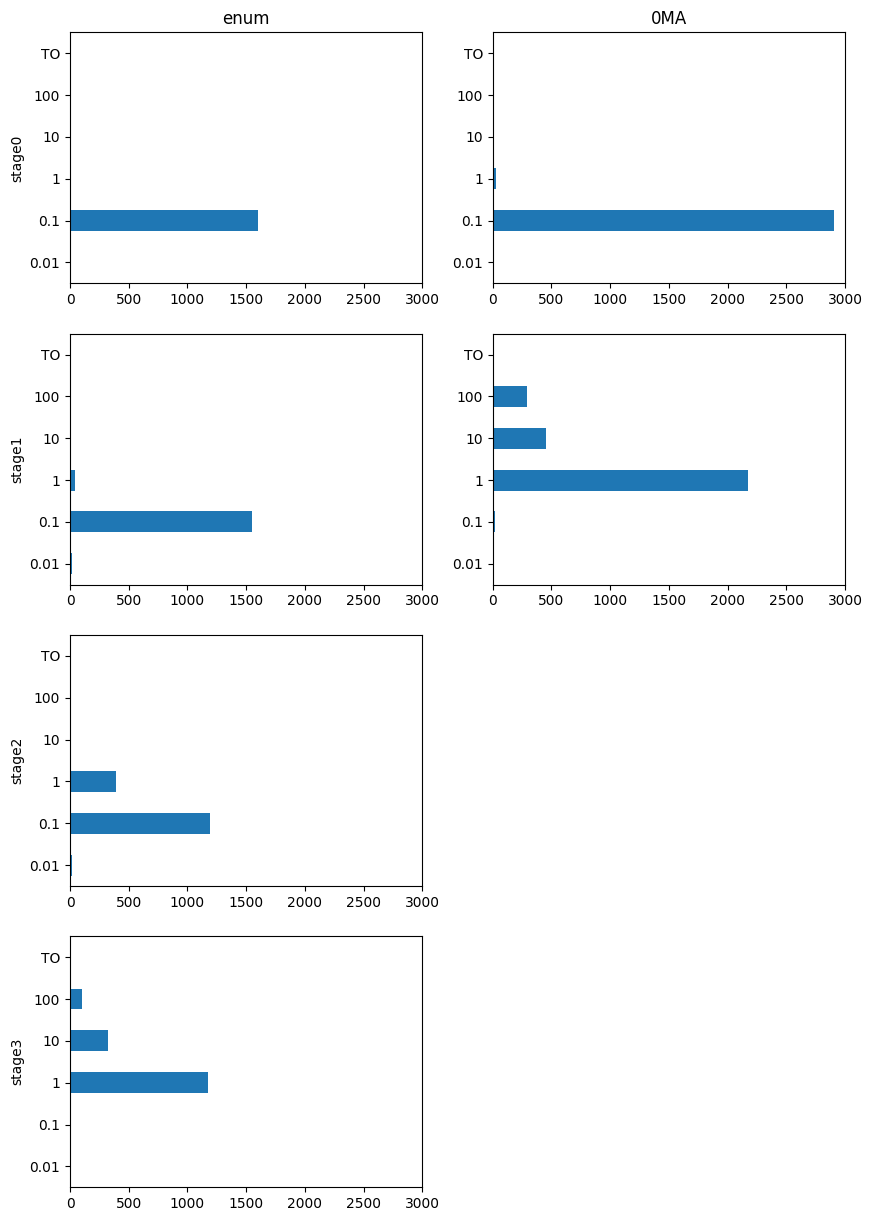

In [10]:
bins = [0, 0.01, 0.1, 1, 10, 100, float('inf')]
labels = ['0.01', '0.1', '1', '10', '100', 'TO']

df_0ma['intervals stage0'] = pd.cut(df_0ma['stage0(med)'], bins=bins, labels=labels)
grouped_0ma_stage0 = df_0ma.groupby(['intervals stage0']).size()

df_0ma['intervals stage1'] = pd.cut(df_0ma['stage1(med)'], bins=bins, labels=labels)
grouped_0ma_stage1 = df_0ma.groupby(['intervals stage1']).size()

df_enum['intervals stage0'] = pd.cut(df_enum['stage0(med)'], bins=bins, labels=labels)
grouped_enum_stage0 = df_enum.groupby(['intervals stage0']).size()

df_enum['intervals stage1'] = pd.cut(df_enum['stage1(med)'], bins=bins, labels=labels)
grouped_enum_stage1 = df_enum.groupby(['intervals stage1']).size()

df_enum['intervals stage2'] = pd.cut(df_enum['stage2(med)'], bins=bins, labels=labels)
grouped_enum_stage2 = df_enum.groupby(['intervals stage2']).size()

df_enum['intervals stage3'] = pd.cut(df_enum['stage3(med)'], bins=bins, labels=labels)
grouped_enum_stage3 = df_enum.groupby(['intervals stage3']).size()

fig, axes = plt.subplots(4, 2, figsize=(10, 15))

grouped_0ma_stage0.plot(kind='barh', ax = axes[0,1])
grouped_0ma_stage1.plot(kind='barh', ax = axes[1,1])
grouped_enum_stage0.plot(kind='barh', ax = axes[0,0])
grouped_enum_stage1.plot(kind='barh', ax = axes[1,0])
grouped_enum_stage2.plot(kind='barh', ax = axes[2,0])
grouped_enum_stage3.plot(kind='barh', ax = axes[3,0])

axes[2, 1].axis('off')
axes[3, 1].axis('off')

axes[0,0].set_title("enum")
axes[0,1].set_title("0MA")
axes[0,0].set_ylabel("stage0")
axes[0,1].set_ylabel("")
axes[1,0].set_ylabel("stage1")
axes[1,1].set_ylabel("")
axes[2,0].set_ylabel("stage2")
axes[3,0].set_ylabel("stage3")
axes[0,0].set_xlim([0,3000])
axes[0,1].set_xlim([0,3000])
axes[1,0].set_xlim([0,3000])
axes[1,1].set_xlim([0,3000])
axes[2,0].set_xlim([0,3000])
axes[3,0].set_xlim([0,3000])